In [12]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = "Iris.csv"
dataset = pd.read_csv(data)
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
# convert the species varriables to numerical values

def trans_mathscore(x):
    if x == "Iris Setosa":
        return 0
    elif x == "Iris Versicolor":
        return 1
    else:
        return 2

dataset["Species"] = dataset["Species"].apply(trans_mathscore)


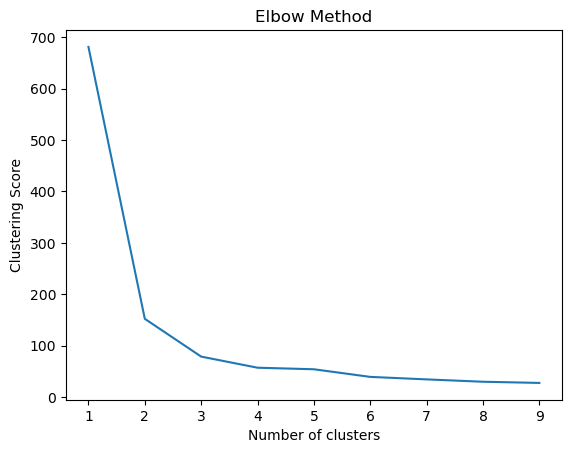

In [14]:
# elbow method to find the optimal number of clusters
individual_clusteringScore = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(dataset[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]])
    individual_clusteringScore.append(kmeans.inertia_)
plt.plot(range(1, 10), individual_clusteringScore)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Clustering Score")
plt.show()

In [15]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(dataset[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]])
pred = kmeans.predict(dataset[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]])
print(pred)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


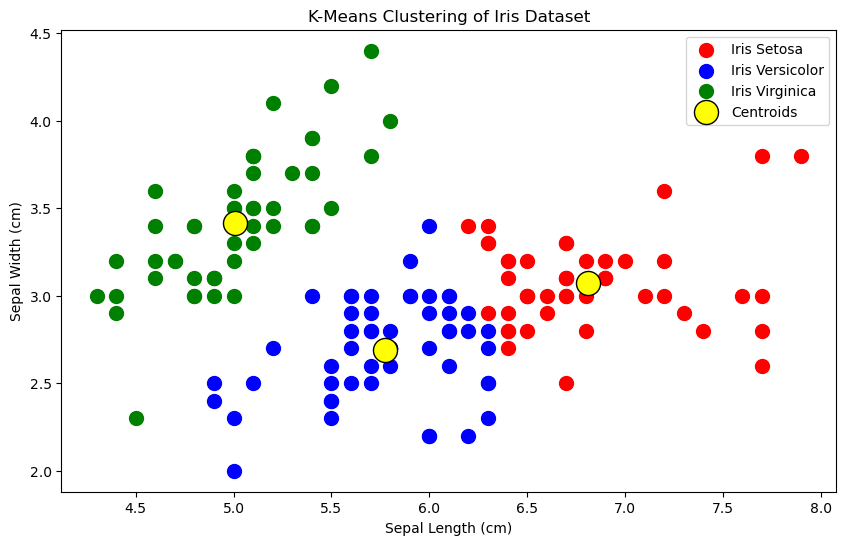

In [19]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
pred = kmeans.fit_predict(dataset)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(dataset[pred == 0, 0], dataset[pred == 0, 1], s=100, c='red', label='Iris Setosa')
plt.scatter(dataset[pred == 1, 0], dataset[pred == 1, 1], s=100, c='blue', label='Iris Versicolor')
plt.scatter(dataset[pred == 2, 0], dataset[pred == 2, 1], s=100, c='green', label='Iris Virginica')

# Plot cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids', edgecolors='black')

plt.title('K-Means Clustering of Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()


In [21]:
from sklearn.metrics import silhouette_score
silhouette_score(dataset,pred)

np.float64(0.4434693231245126)